In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

len(perch_length)

56

In [2]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

---
# 모델 훈련

In [6]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

---
# 훈련한 모델로 새로운 데이터 예측해보기

[[6. 7. 7.]]
[[34  8 14]]


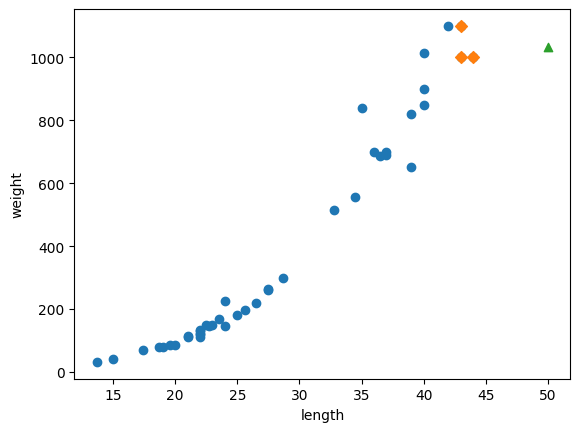

In [14]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]]) # 2차원 배열 형태로 
print(distances)
print(indexes)
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

몇으로 예측한건지 숫자로 확인해보기

In [15]:
print(np.mean(train_target[indexes]))

1033.3333333333333


---
# 엉뚱한 값으로 예측한 이유
- 실제 `length`가 50인 농어의 무게는 1033g보다 훨씬 무겁다고 함. 
- 모델이 실제 값과 차이가 있는 값으로 예측한 이유는, 주어진 샘플의 `length`가 학습한 데이터셋 내의 범위에서 벗어나있는 값이기 때문
    - `length`가 100인 농어의 무게를 예측시켜도 1033g으로 예측한다.

진짜 그런지 한번 살펴보자

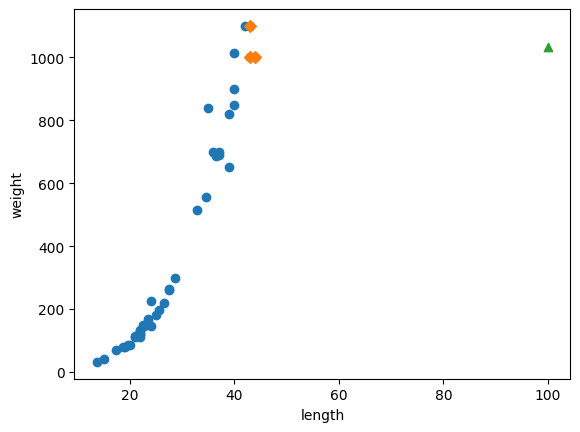

In [16]:
distances, indexes = knr.kneighbors([[100]])
predicted_weight = np.mean(train_target[indexes])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(100, predicted_weight, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

---
# 문제 해결하기

### 1. 선형 회귀로 해결하기
- 학습한 데이터들의 '경향'을 학습시킨다면, 새로 들어온 샘플이 학습한 범위 내에 없더라도 학습한 경향성에 따라 어느정도의 값을 가질 지 예측하도록 할 수 있음 → By 선형회귀
    - 사이킷런에서 선형 회귀 모델은 `LinearRegression`으로 가져올 수 있음
    - 즉 `KNeighborRegression` → `LinearRegression`

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1241.83860323]


- 선형 회귀 모델을 학습시키는 것은 x축 변수(length)를 기준으로 $y=ax+b$에 대해 $a, b$값을 찾아내는 것임
    - $a, b$값은 각각 모델의 `.coef_`, `.intercept_`에 저장되어있음     
- $a, b$값을 모델의 파라미터라고 함
    - K-최근접 이웃 모델은 모델의 파라미터가 없었는데, 이러한 모델을 훈련시키는 것을 '사례 기반 학습'이라고 함
    - 반면 선형 회귀 모델처럼 데이터를 기반으로 모델의 파라미터를 찾는 방식으로 훈련시키는 것을 '모델 기반 학습'이라고 함

In [18]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


length값 15부터 50까지에 대한 선형 방정식 그래프 그려보기

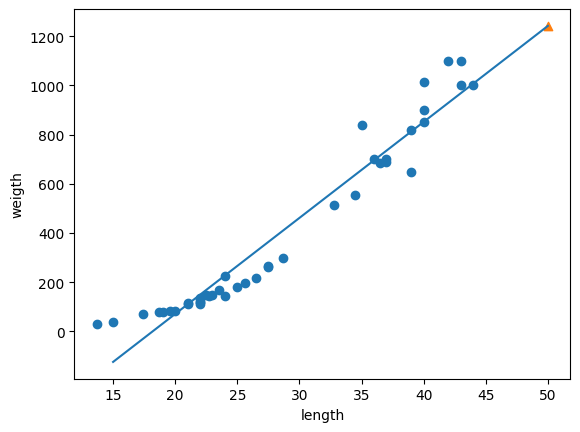

In [20]:
plt.scatter(train_input, train_target)

plt.plot([15, 50], [lr.coef_*15 + lr.intercept_, lr.coef_*50 + lr.intercept_])

plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

훈련 셋과 테스트 셋에 대한 점수 확인해보기

In [21]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.8247503123313559


- 테스트 점수가 낮게 나온것으로 봤을 때 오버피팅을 의심할 수도 있지만, 훈련 셋에 대한 점수도 사실 딱히 높은건 아님. 따라서 과소적합을 의심해볼 수 있음.
- 그러나 진짜 이유는 선형 방정식으로 데이터셋을 온전하게 표현할 수 없다는 것.
- 가장 큰 문제는, 그래프에 따르면 length가 일정 수준 이상으로 작으면 무게를 음수로 예측할 수도 있다는게 제일 문제이다.        
→ 선형 방정식이 아닌 곡선으로 문제를 해결해보자!

### 2. 다항 회귀로 해결하기
- 사실 데이터셋의 분포는 직선이 아니라 곡선 형태에 가깝게 이루어져있음.
- 선형 회귀는 x축 변수(length)를 기준으로 $y=ax+b$에 대해 $a, b$값을 찾았다면, 다항 회귀에서는 (2차함수를 가정할 때) length를 기준으로 $y=ax^2+bx+c$에 대해 $a,b,c$값을 찾도록 만들어줄 수 있음
- 다항식을 활용한 선형 회귀를 '다항 회귀'라고 한다.

In [24]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly.shape)
print(test_poly.shape)

(42, 2)
(14, 2)


In [25]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]])) # 이차 방정식으로 모델을 세팅했기 때문에 피쳐값 또한 이차 방정식에 맞는 형태로 넣어줘야함

[1573.98423528]


In [26]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278247


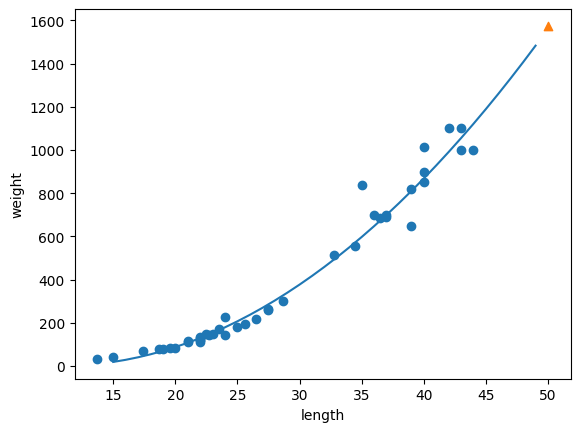

In [27]:
point = np.arange(15, 50) # 15 ~ 49까지의 정수 배열

plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [28]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121


- 둘 다 점수가 높아졌지만, 여전히 테스트셋의 점수가 높게 나오므로 언더피팅을 의심해볼 수 있음 → 모델의 복잡성을 높여볼 여지가 생김

---
# 참고

🧐 이차 방정식으로 모델을 세팅했는데 그럼 이건 비선형 회귀인가요?

👉 '선형 회귀' 란 입력과 타겟 사이의 관계가 선형적이라는게 아니라, 회귀 모델의 가중치(계수)와 타겟 사이의 관계를 의미한다. 따라서 제곱이든 세제곱이든 여전히 선형 회귀로 다룰 수 있다.